In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import requests
from config import weather_api_key

import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

585

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinkat
City not found. Skipping...
Processing Record 2 of Set 1 | ugoofaaru
Processing Record 3 of Set 1 | nizwa
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | nampula
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | agua branca
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | haines junction
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | filadelfia
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | castlegar
Processing Record 22 of Set 1 | saint-philippe
Processing R

Processing Record 38 of Set 4 | antofagasta
Processing Record 39 of Set 4 | tambilil
Processing Record 40 of Set 4 | kupino
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | ca mau
Processing Record 43 of Set 4 | kushima
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | itaituba
Processing Record 46 of Set 4 | farim
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | svetlogorsk
Processing Record 50 of Set 4 | domoni
Processing Record 1 of Set 5 | farafangana
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | salamiyah
Processing Record 5 of Set 5 | uwayl
City not found. Skipping...
Processing Record 6 of Set 5 | talcahuano
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | nelson bay
Processing Record 9 of Set 5 | bonavista
Processing Record 10 of Set 5 | lorca
Processing Record 11 of Set 5 | la so

Processing Record 29 of Set 8 | chuy
Processing Record 30 of Set 8 | batagay-alyta
Processing Record 31 of Set 8 | orlik
Processing Record 32 of Set 8 | ust-omchug
Processing Record 33 of Set 8 | payakumbuh
Processing Record 34 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 8 | bandarbeyla
Processing Record 36 of Set 8 | prince george
Processing Record 37 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | calabar
Processing Record 40 of Set 8 | rawah
Processing Record 41 of Set 8 | bedele
Processing Record 42 of Set 8 | anori
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | atar
Processing Record 45 of Set 8 | fort nelson
Processing Record 46 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 47 of Set 8 | eden
Processing Record 48 of Set 8 | kondopoga
Processing Record 49 of Set 8 | pangnirtung
Processing Record 50 of Set 8 | voznesenye
Pr

Processing Record 16 of Set 12 | mackenzie
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | high level
Processing Record 19 of Set 12 | bairnsdale
Processing Record 20 of Set 12 | lasa
Processing Record 21 of Set 12 | uarini
Processing Record 22 of Set 12 | tampico
Processing Record 23 of Set 12 | uruguaiana
Processing Record 24 of Set 12 | bilibino
Processing Record 25 of Set 12 | luena
Processing Record 26 of Set 12 | kodinsk
Processing Record 27 of Set 12 | kiunga
Processing Record 28 of Set 12 | kamina
Processing Record 29 of Set 12 | waddan
Processing Record 30 of Set 12 | codrington
Processing Record 31 of Set 12 | matara
Processing Record 32 of Set 12 | lincoln
Processing Record 33 of Set 12 | soars
Processing Record 34 of Set 12 | manicore
Processing Record 35 of Set 12 | toliary
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
len(city_data)

538

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ugoofaaru,5.6667,73.0000,81.21,79,91,14.47,MV,2021-11-17 22:06:07
1,Nizwa,22.9333,57.5333,68.16,55,0,1.97,OM,2021-11-17 22:06:07
2,Punta Arenas,-53.1500,-70.9167,50.11,43,16,24.29,CL,2021-11-17 22:02:31
3,Tiksi,71.6872,128.8694,-6.66,96,100,3.00,RU,2021-11-17 22:06:07
4,Jamestown,42.0970,-79.2353,63.72,77,20,11.50,US,2021-11-17 22:06:08
5,Bethel,41.3712,-73.4140,53.69,64,90,1.99,US,2021-11-17 22:06:08
6,Hithadhoo,-0.6000,73.0833,82.04,78,98,17.65,MV,2021-11-17 22:06:08
7,Ushuaia,-54.8000,-68.3000,38.86,75,90,32.21,AR,2021-11-17 22:06:09
8,Mataura,-46.1927,168.8643,57.58,50,61,5.66,NZ,2021-11-17 22:06:09
9,Nampula,-15.1165,39.2666,73.04,80,71,8.05,MZ,2021-11-17 22:06:09


In [9]:
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ugoofaaru,MV,2021-11-17 22:06:07,5.6667,73.0000,81.21,79,91,14.47
1,Nizwa,OM,2021-11-17 22:06:07,22.9333,57.5333,68.16,55,0,1.97
2,Punta Arenas,CL,2021-11-17 22:02:31,-53.1500,-70.9167,50.11,43,16,24.29
3,Tiksi,RU,2021-11-17 22:06:07,71.6872,128.8694,-6.66,96,100,3.00
4,Jamestown,US,2021-11-17 22:06:08,42.0970,-79.2353,63.72,77,20,11.50
5,Bethel,US,2021-11-17 22:06:08,41.3712,-73.4140,53.69,64,90,1.99
6,Hithadhoo,MV,2021-11-17 22:06:08,-0.6000,73.0833,82.04,78,98,17.65
7,Ushuaia,AR,2021-11-17 22:06:09,-54.8000,-68.3000,38.86,75,90,32.21
8,Mataura,NZ,2021-11-17 22:06:09,-46.1927,168.8643,57.58,50,61,5.66
9,Nampula,MZ,2021-11-17 22:06:09,-15.1165,39.2666,73.04,80,71,8.05


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

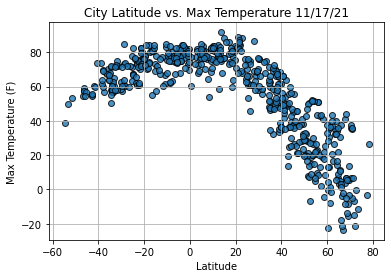

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

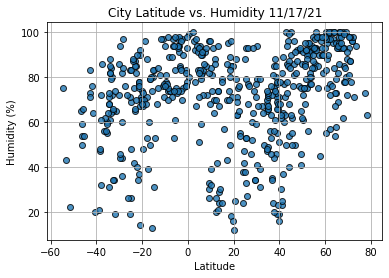

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

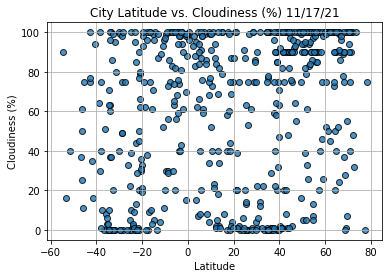

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

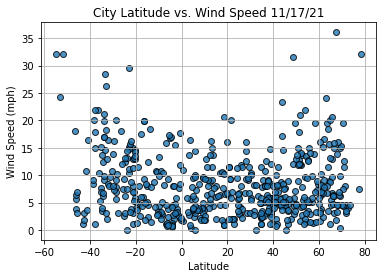

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()